In [1]:
import geopandas as gpd
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance

## Preprocess buildings

In [2]:
buildings = gpd.read_parquet("/data/uscuni-ulce/boundaries_of_change/classification/")

Remap clusters

In [ ]:
final_clusters = pd.read_parquet(
    "/data/uscuni-ulce/processed_data/clusters/cluster_mapping_v3.pq"
)
final_clusters

In [ ]:
level_columns = []

In [ ]:
for level in final_clusters.columns:
    buildings[f"level_{level}"] = buildings.final_without_noise.map(
        final_clusters[level]
    )
    level_columns.append(f"level_{level}")

In [ ]:
buildings.head()

In [3]:
gpd.list_layers("/data/uscuni-ulce/boundaries_of_change/impact_boundaries.gpkg")

,name,geometry_type
0,1240_mongol_invasion,Polygon
1,900_political,Polygon
2,1000_political,Polygon
3,1300_ostsiedlung,Polygon
4,1550_religion,Polygon
5,1526_political,Polygon
6,1618_political,Polygon
7,1648_political,Polygon
8,1600_religion,Polygon
9,1812_political,Polygon


In [46]:
boundary_list = list(gpd.list_layers("/data/uscuni-ulce/boundaries_of_change/impact_boundaries.gpkg").name)

ValueError: zero-size array to reduction operation fmin which has no identity

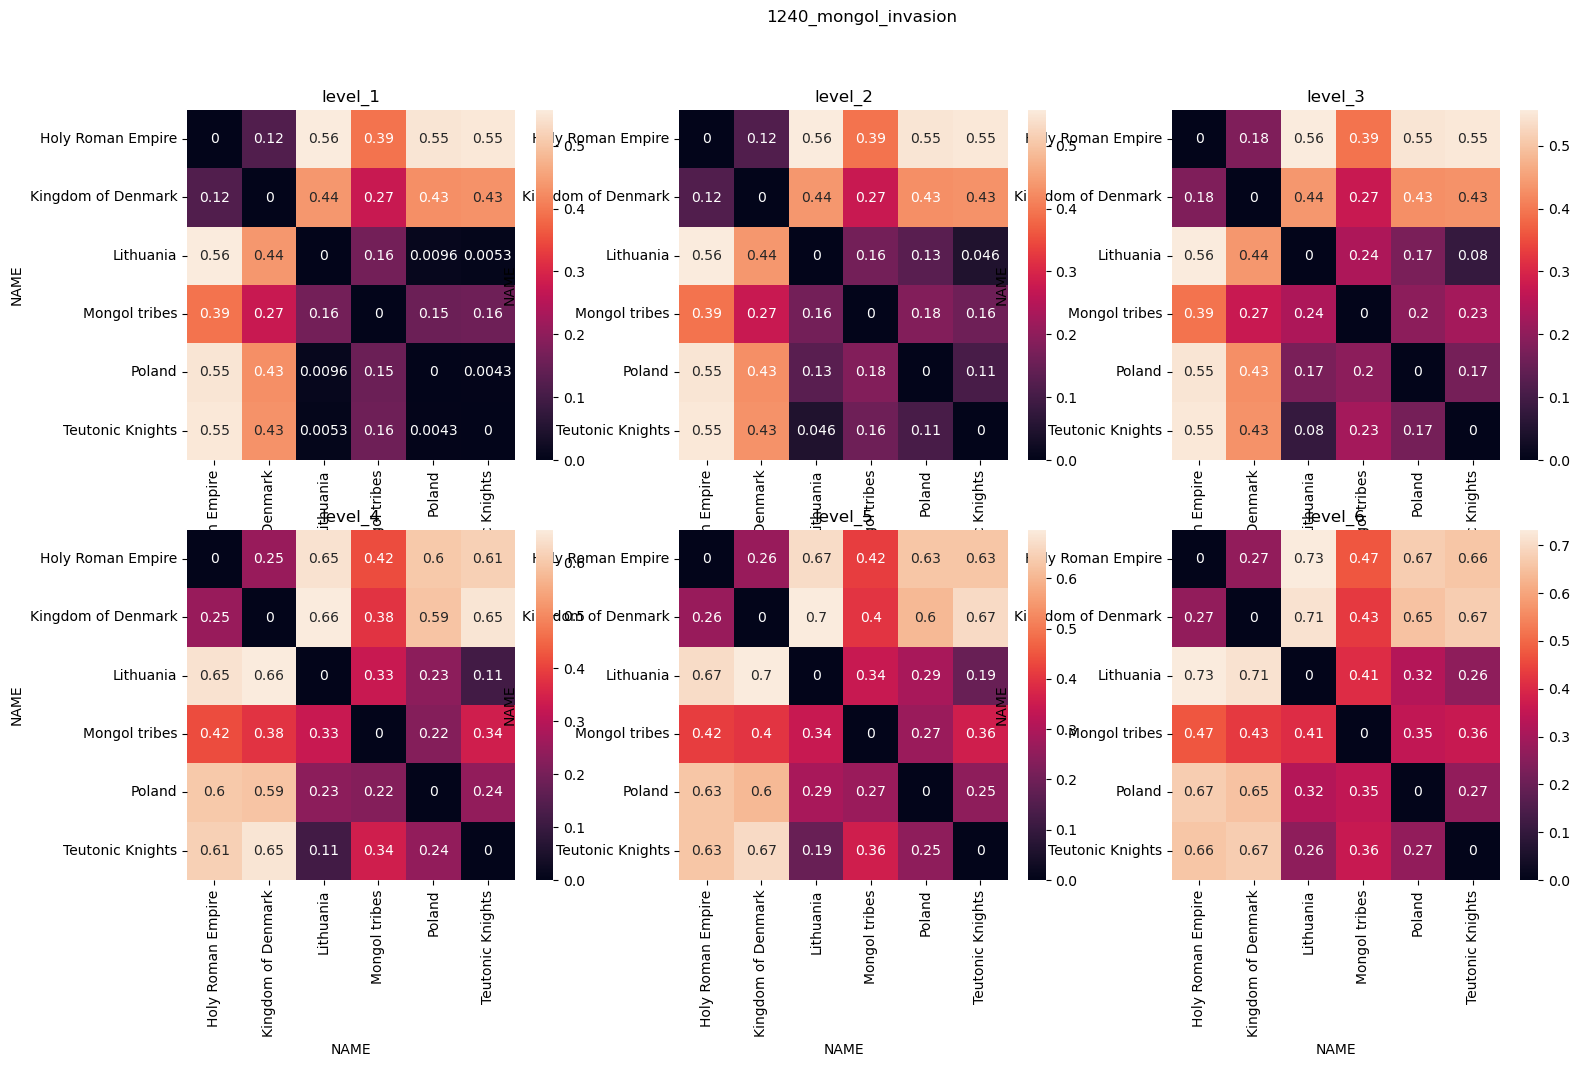

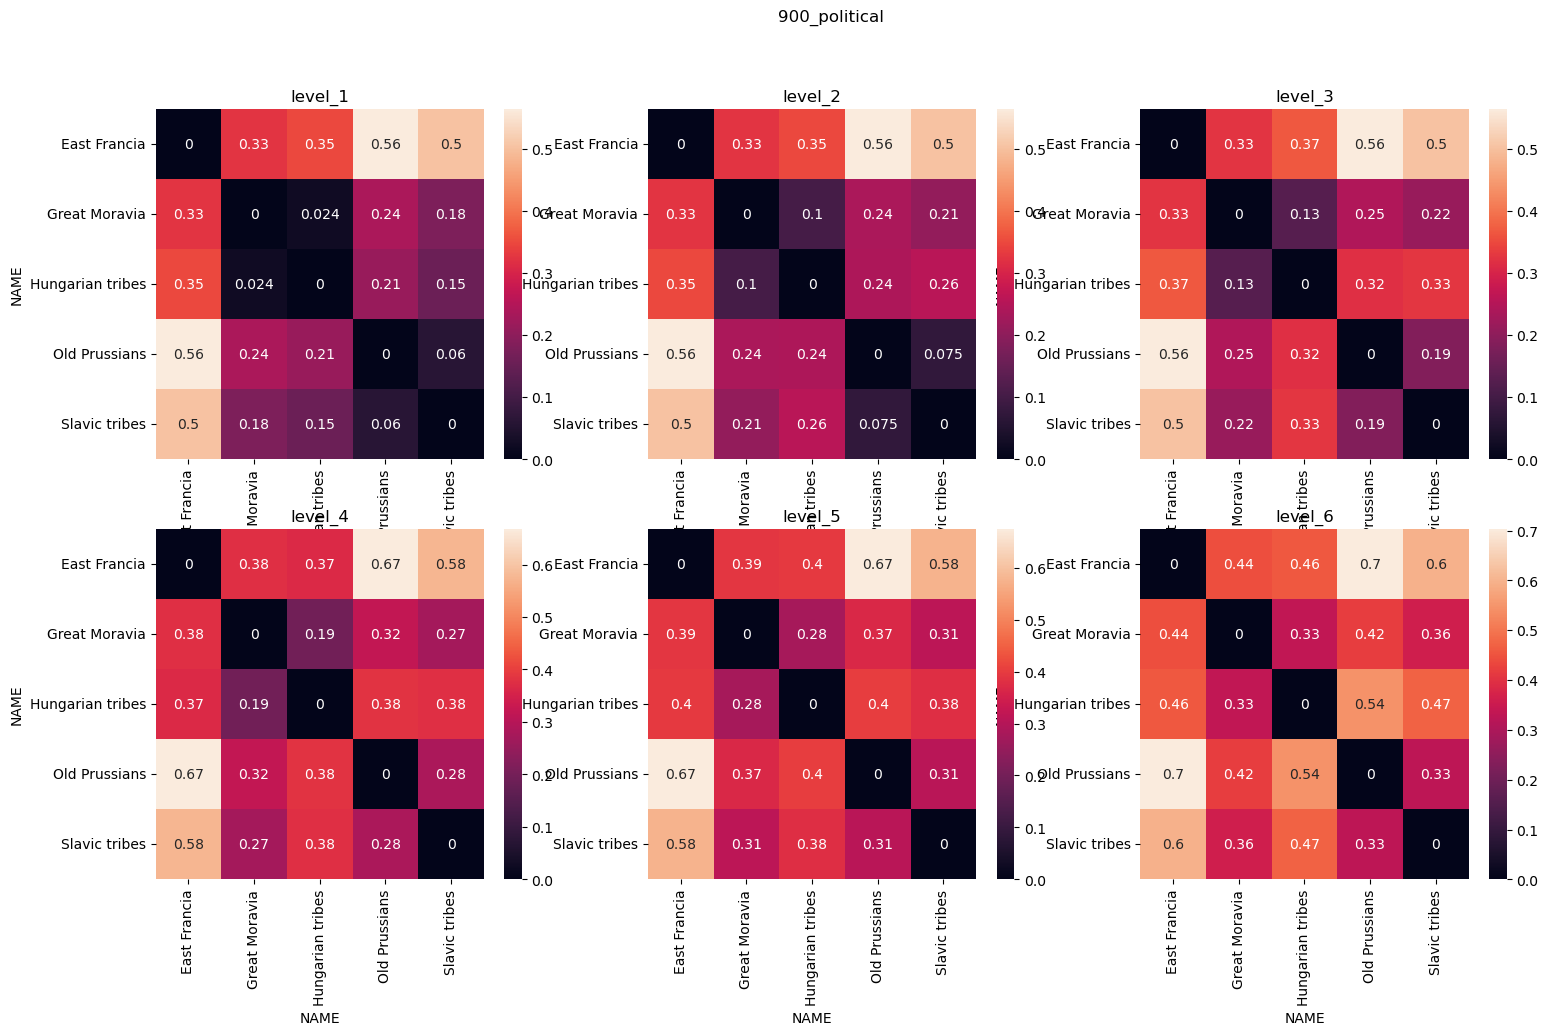

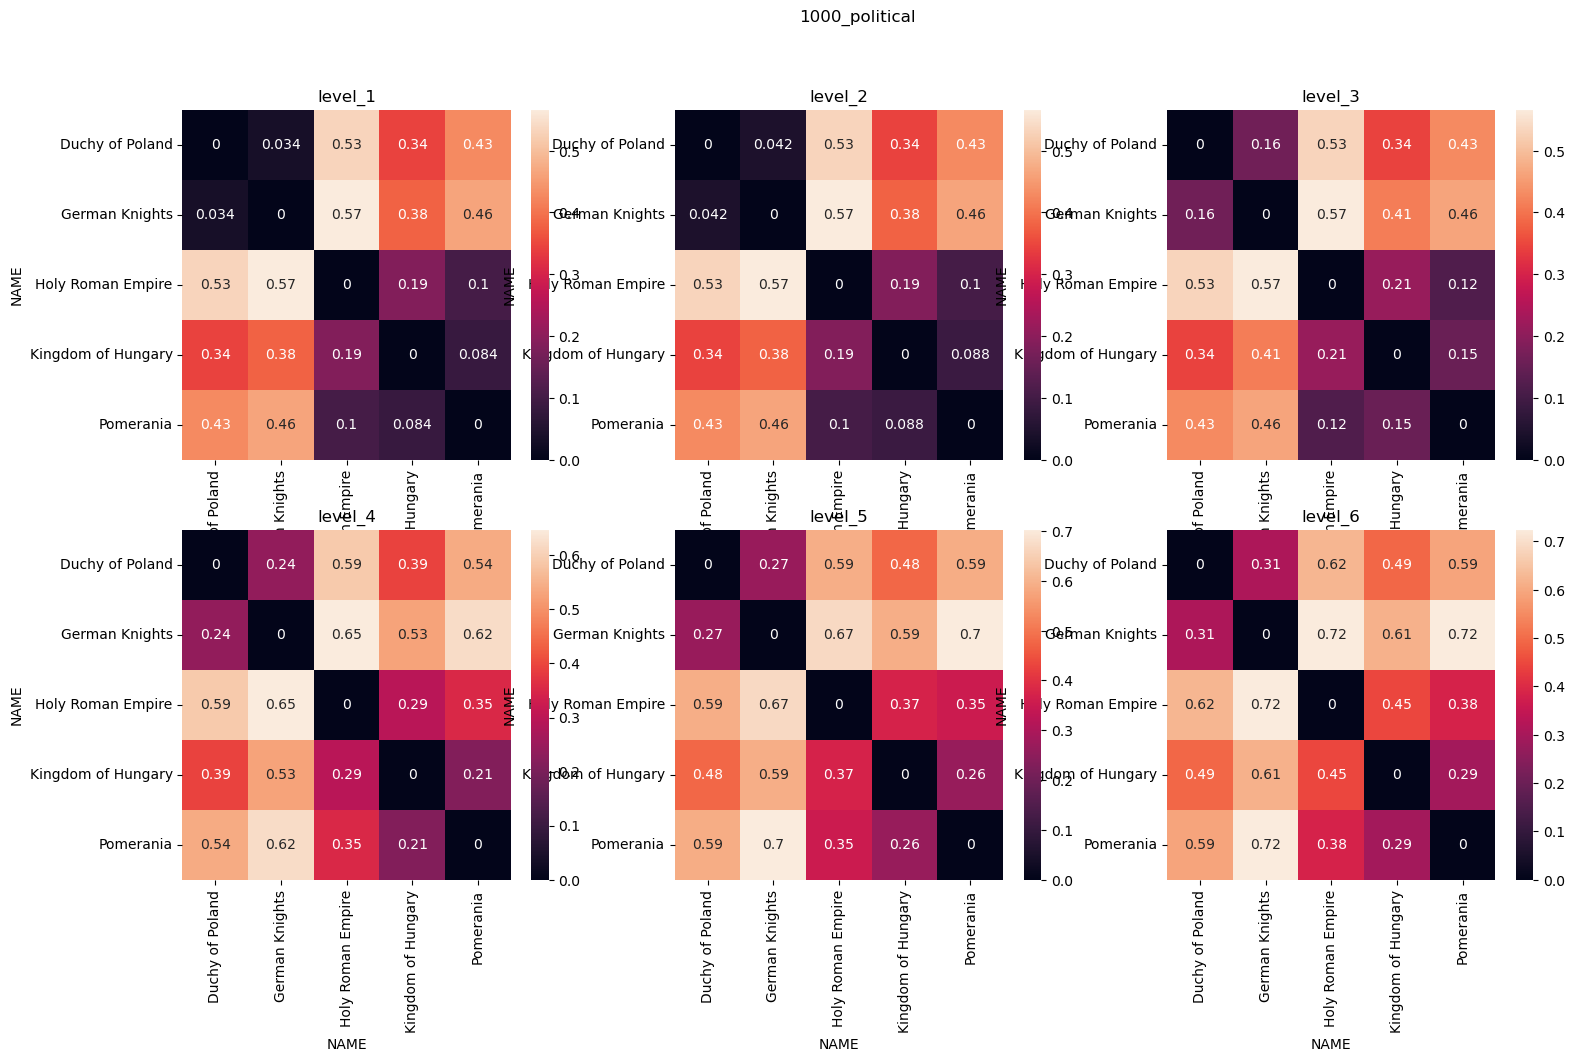

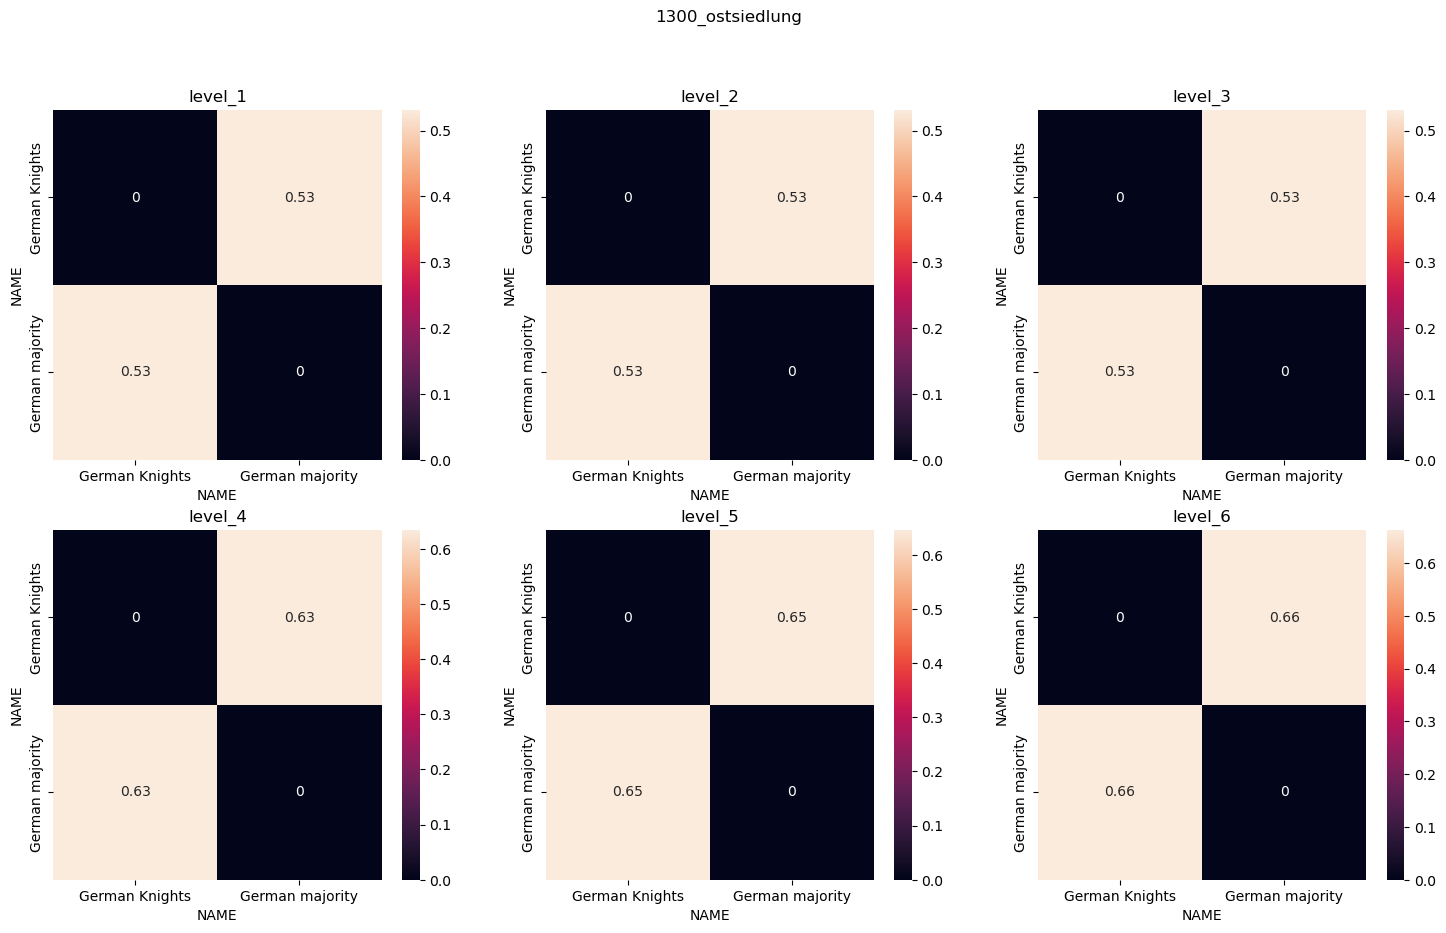

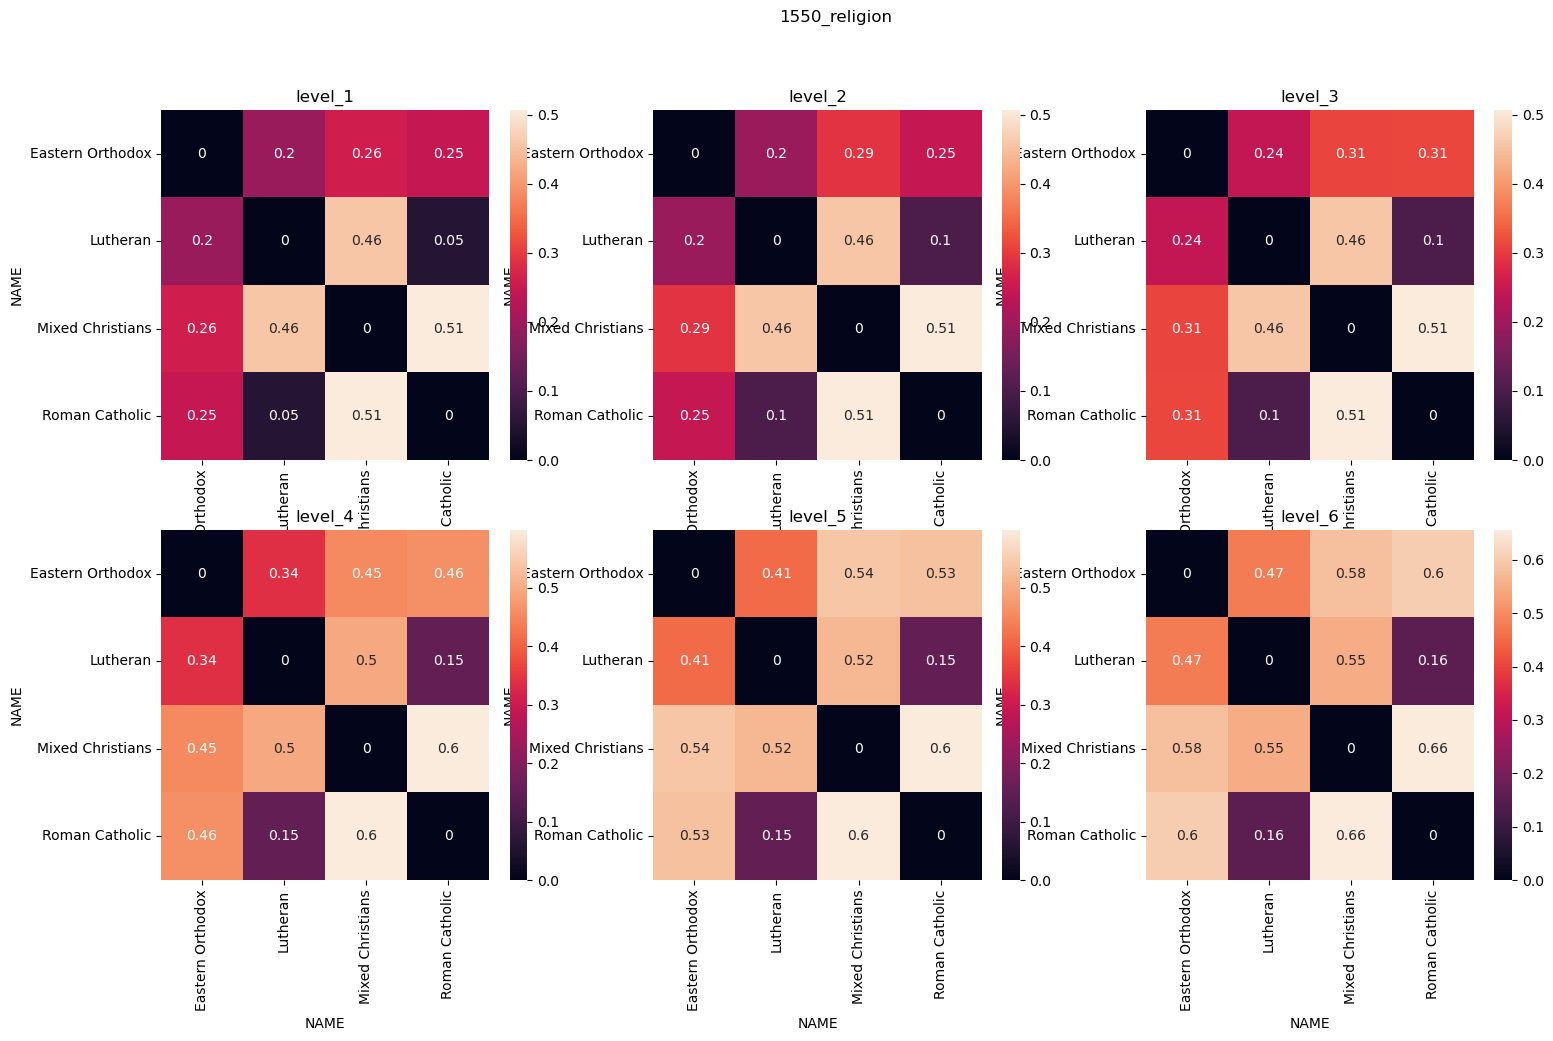

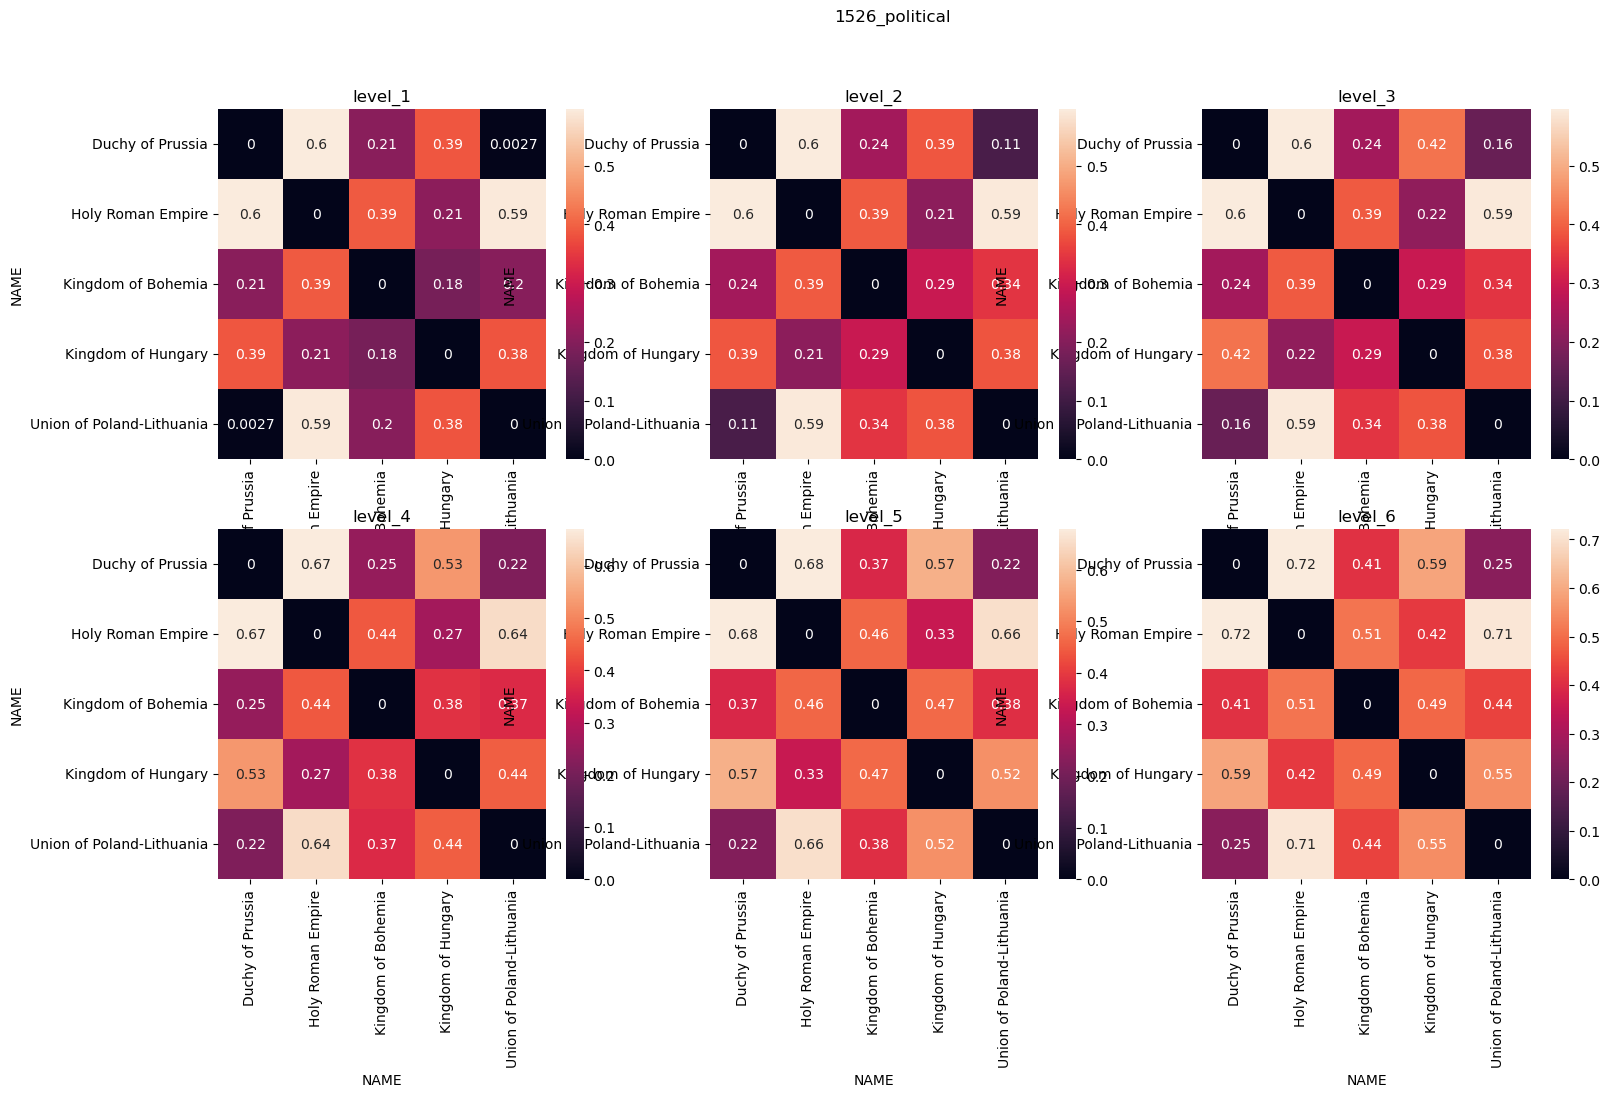

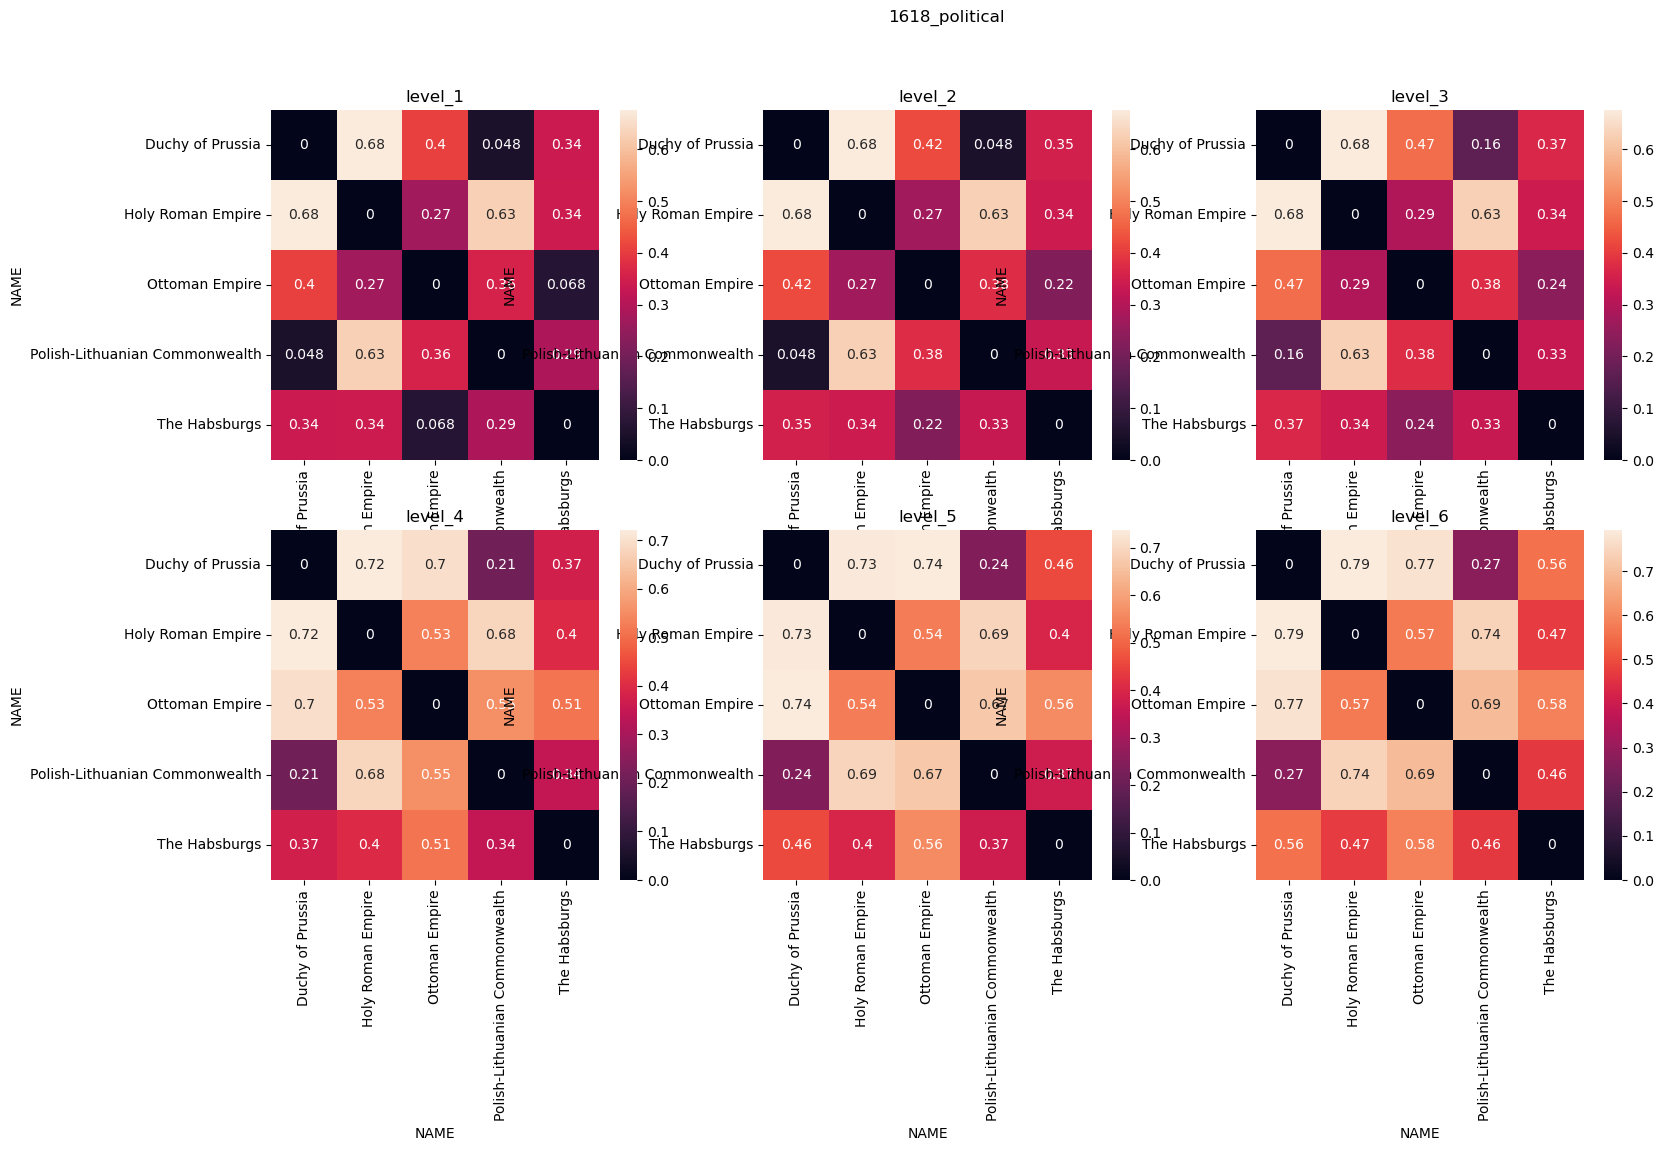

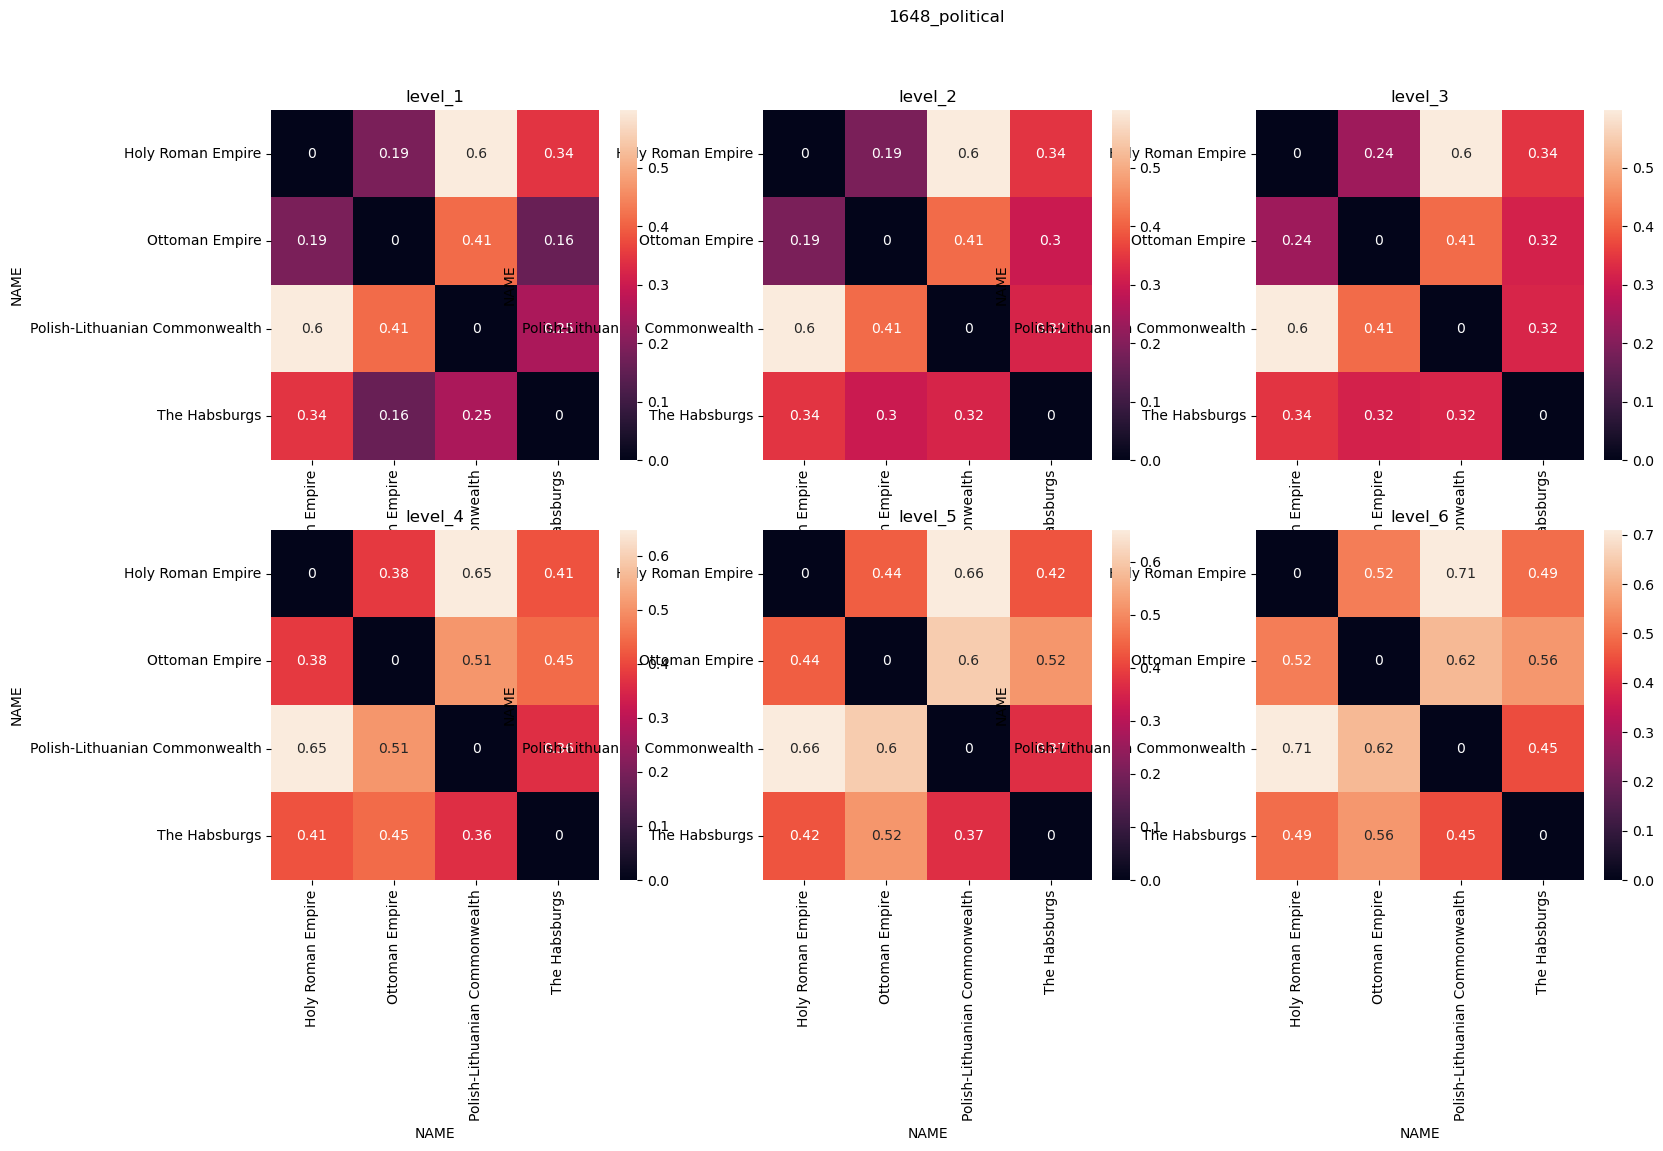

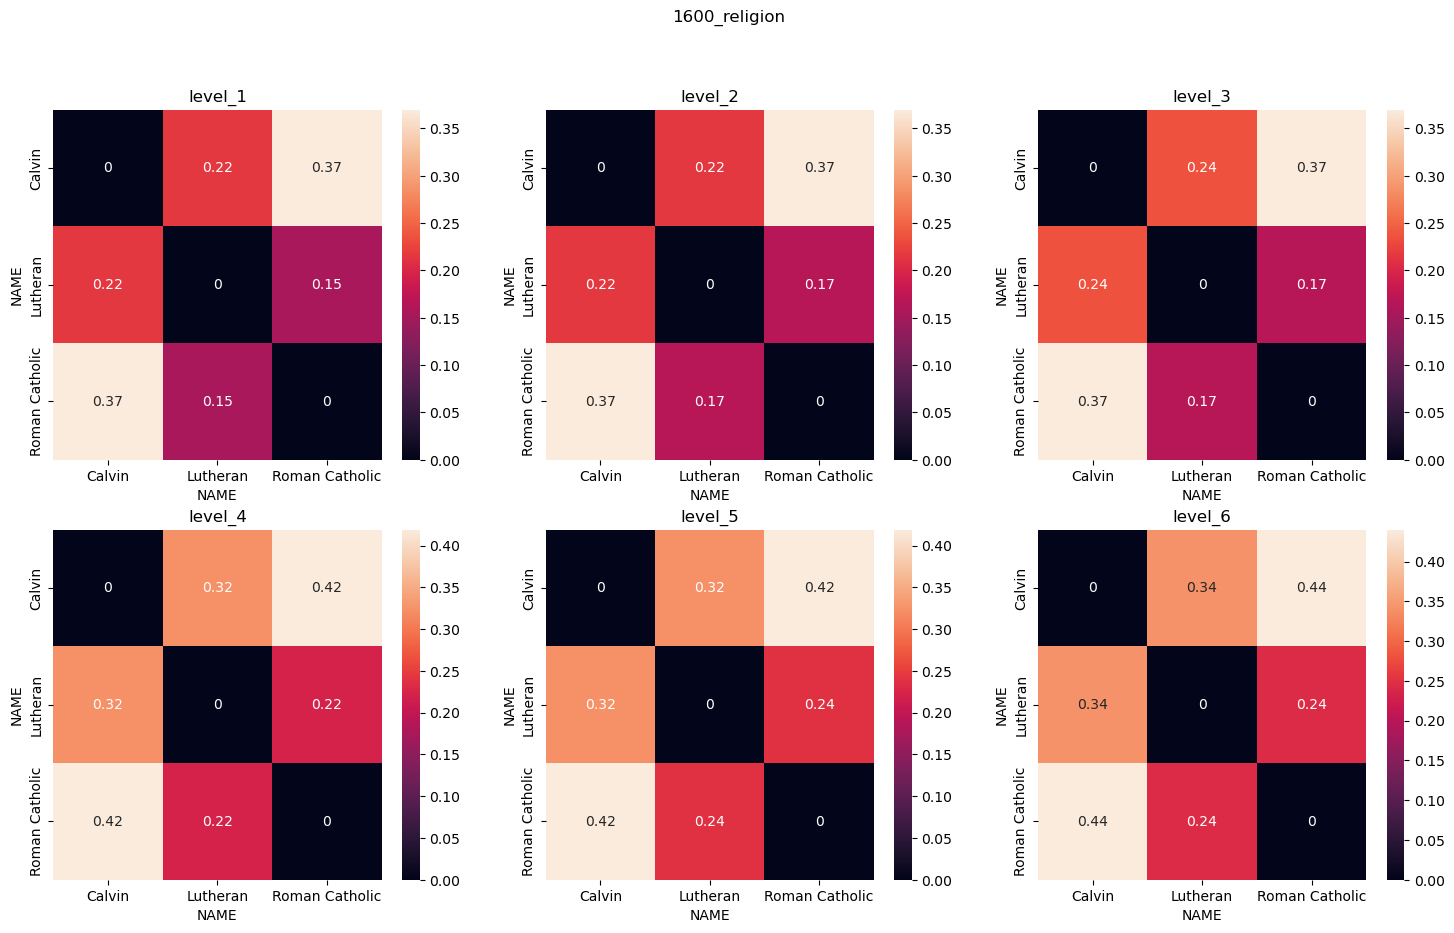

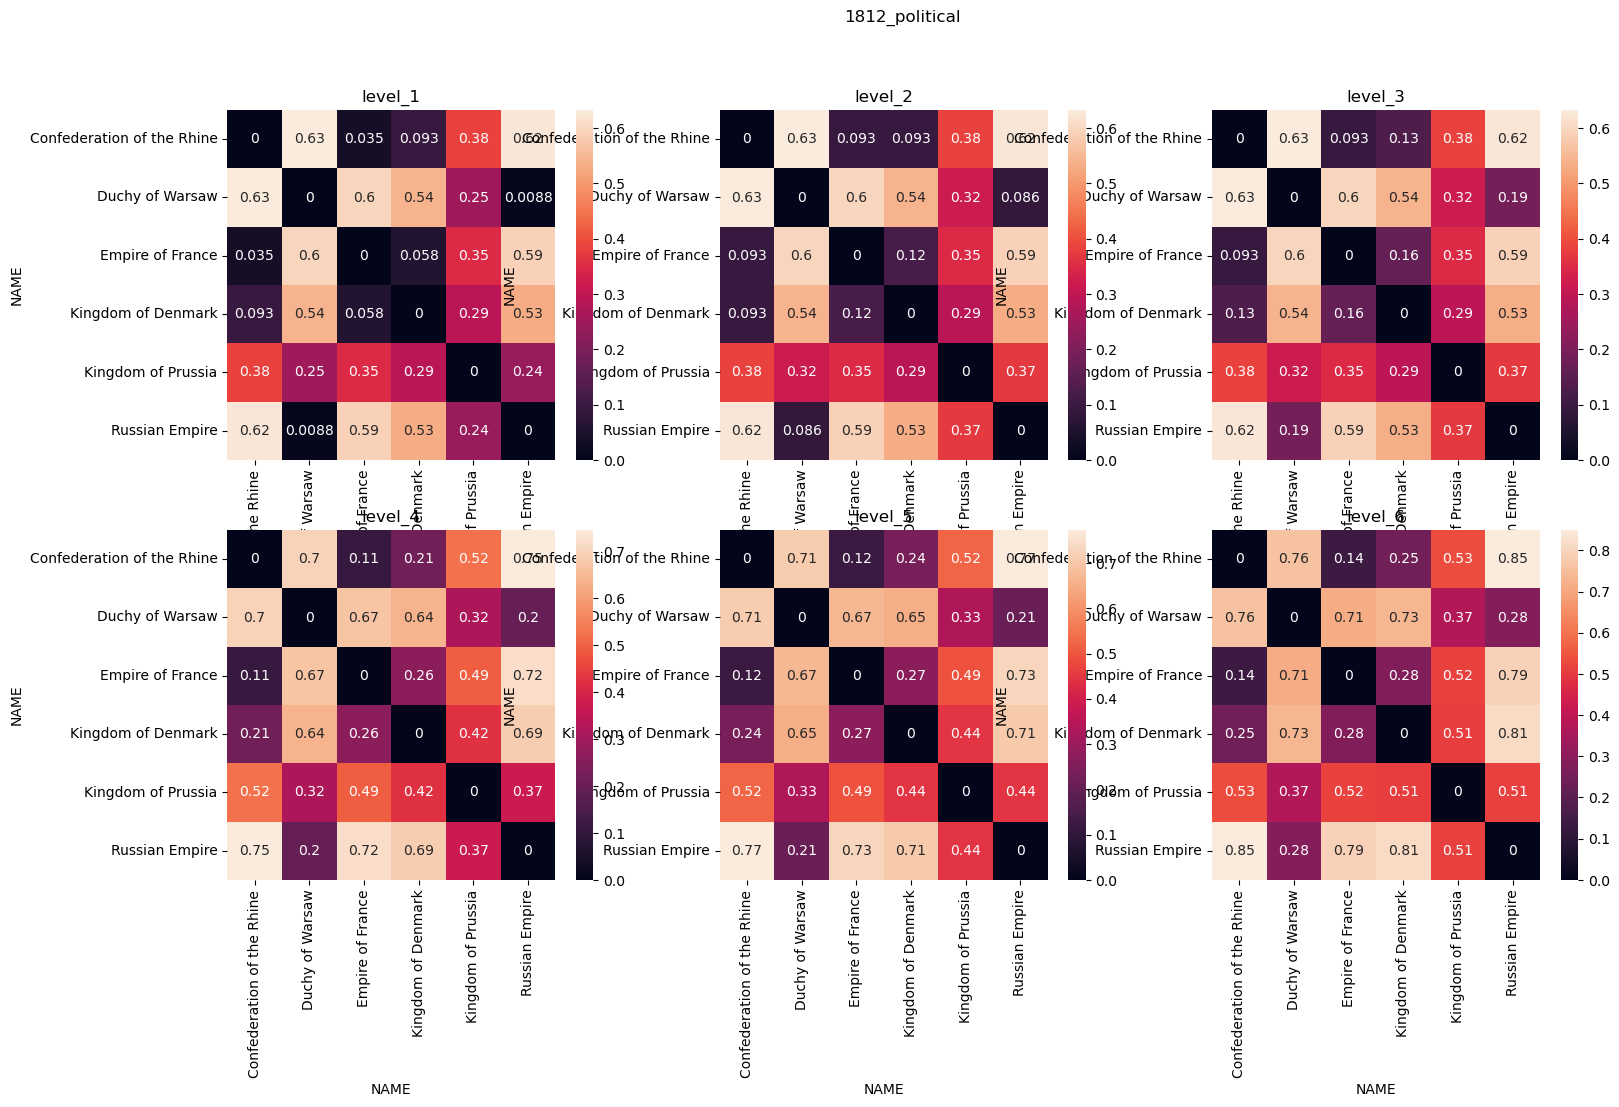

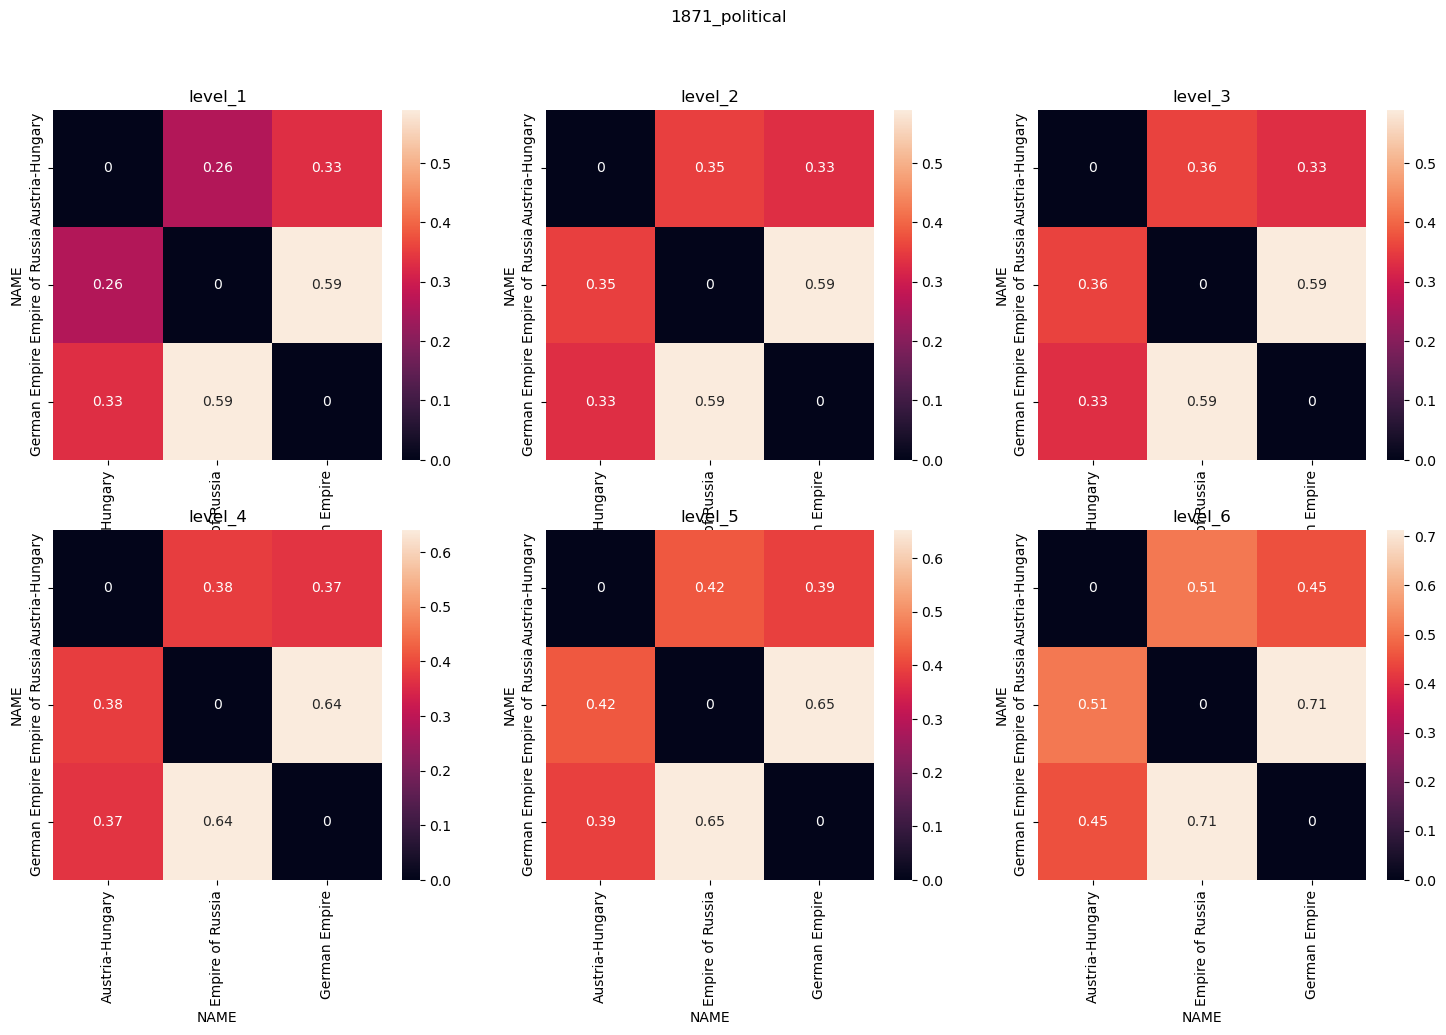

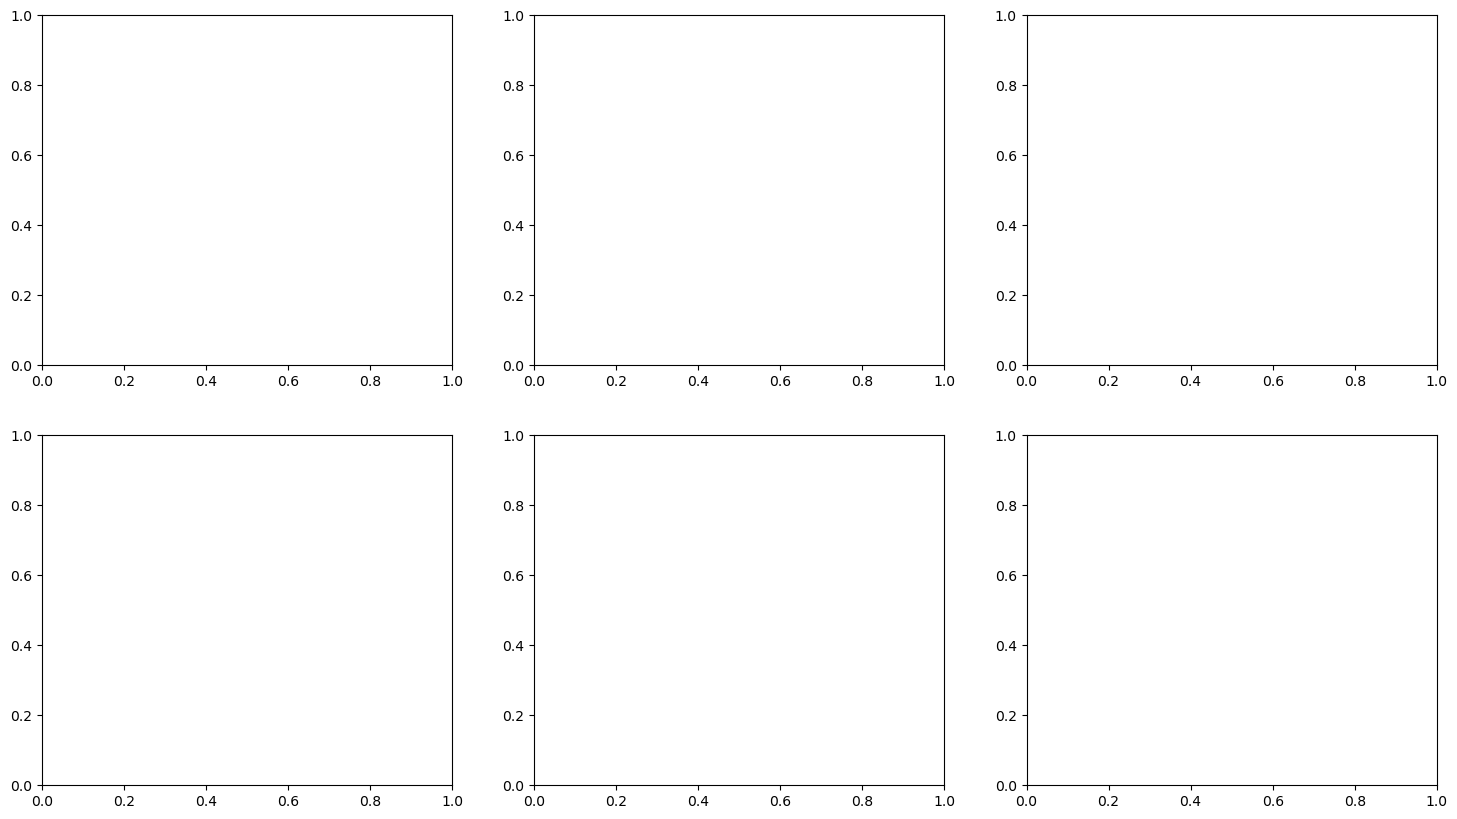

In [58]:
for bnd in boundary_list:
    boundary = gpd.read_file("/data/uscuni-ulce/boundaries_of_change/impact_boundaries.gpkg", layer=bnd)
    joined = gpd.sjoin(buildings, boundary, how="left", predicate="within")
    generate_bc_heatmaps_for_boundary(level_columns, bnd)

In [4]:
boundaries = gpd.read_file("/data/uscuni-ulce/boundaries_of_change/impact_boundaries.gpkg", layer="1960_political")
boundaries= boundaries[boundaries.NAME != "Hungary"]

In [5]:
buildings.head()

,geometry,final_without_noise,area
__null_dask_index__,,,
0,POINT (4099683.344 3108236.287),50,66.767646
1,POINT (4100189.13 3108803.392),1,427.019080
2,POINT (4100069.189 3109146.3),1,144.324859
3,POINT (4100144.944 3108299.666),1,139.581363
4,POINT (4100022.946 3108688.179),1,41.651016


In [6]:
final_clusters = pd.read_parquet(
    "/data/uscuni-ulce/processed_data/clusters/cluster_mapping_v3.pq"
)
final_clusters

,1,2,3,4,5,6
7,,,,,,
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,2
4,1,1,1,1,1,2
5,1,1,1,1,2,3
...,...,...,...,...,...,...
104,2,4,8,16,31,59
105,2,4,8,16,31,59
106,2,4,8,16,32,60


In [7]:
level_columns = []

In [8]:
for level in final_clusters.columns:
    buildings[f"level_{level}"] = buildings.final_without_noise.map(
        final_clusters[level]
    )
    level_columns.append(f"level_{level}")

In [9]:
buildings.head()

,geometry,final_without_noise,area,level_1,level_2,level_3,level_4,level_5,level_6
__null_dask_index__,,,,,,,,,
0,POINT (4099683.344 3108236.287),50,66.767646,1,2,4,8,16,30
1,POINT (4100189.13 3108803.392),1,427.019080,1,1,1,1,1,1
2,POINT (4100069.189 3109146.3),1,144.324859,1,1,1,1,1,1
3,POINT (4100144.944 3108299.666),1,139.581363,1,1,1,1,1,1
4,POINT (4100022.946 3108688.179),1,41.651016,1,1,1,1,1,1


In [10]:
level_columns

['level_1', 'level_2', 'level_3', 'level_4', 'level_5', 'level_6']

In [11]:
boundaries.explore()

In [12]:
boundaries.head()

,NAME,NOTES,geometry
0,West Germany,None,"MULTIPOLYGON (((4351305.316 3476171.174, 43440..."
1,Czechoslovakia,None,"MULTIPOLYGON (((4630531.409 3110893.427, 46357..."
2,Austria,None,"MULTIPOLYGON (((4355225.354 2715902.995, 43542..."
3,East Germany,None,"MULTIPOLYGON (((4473567.692 3024891.982, 44575..."
4,Poland,None,"MULTIPOLYGON (((4922206.626 3502100.945, 49317..."


In [62]:
joined = gpd.sjoin(buildings, boundaries, how="left", predicate="within")
joined.head()

,geometry,final_without_noise,area,level_1,level_2,level_3,level_4,level_5,level_6,index_right,NAME,NOTES
__null_dask_index__,,,,,,,,,,,,
0,POINT (4099683.344 3108236.287),50,66.767646,1,2,4,8,16,30,0.0,West Germany,None
1,POINT (4100189.13 3108803.392),1,427.019080,1,1,1,1,1,1,0.0,West Germany,None
2,POINT (4100069.189 3109146.3),1,144.324859,1,1,1,1,1,1,0.0,West Germany,None
3,POINT (4100144.944 3108299.666),1,139.581363,1,1,1,1,1,1,0.0,West Germany,None
4,POINT (4100022.946 3108688.179),1,41.651016,1,1,1,1,1,1,0.0,West Germany,None


In [56]:
def generate_bc_heatmaps_for_boundary(level_list, boundary_name):

    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    axs = axs.flatten()
    
    for level, ax in zip(level_list, axs):
        grouped = joined.groupby("NAME")[level].value_counts()
        cnt_table = pd.DataFrame(grouped.unstack().fillna(0).T)
        #print(cnt_table)
        #cnt_table = cnt_table.drop([3,4,10])

        region_building_sums = cnt_table.sum(axis=0)
        cnt_table_norm = cnt_table.div(region_building_sums, axis=1)

        bc = compute_bc_matrix(cnt_table_norm)
        sns.heatmap(bc, annot=True, ax=ax)
        ax.set_title(level)

    fig.suptitle(boundary_name)

Outliers on rows 3,4,10 on level 4

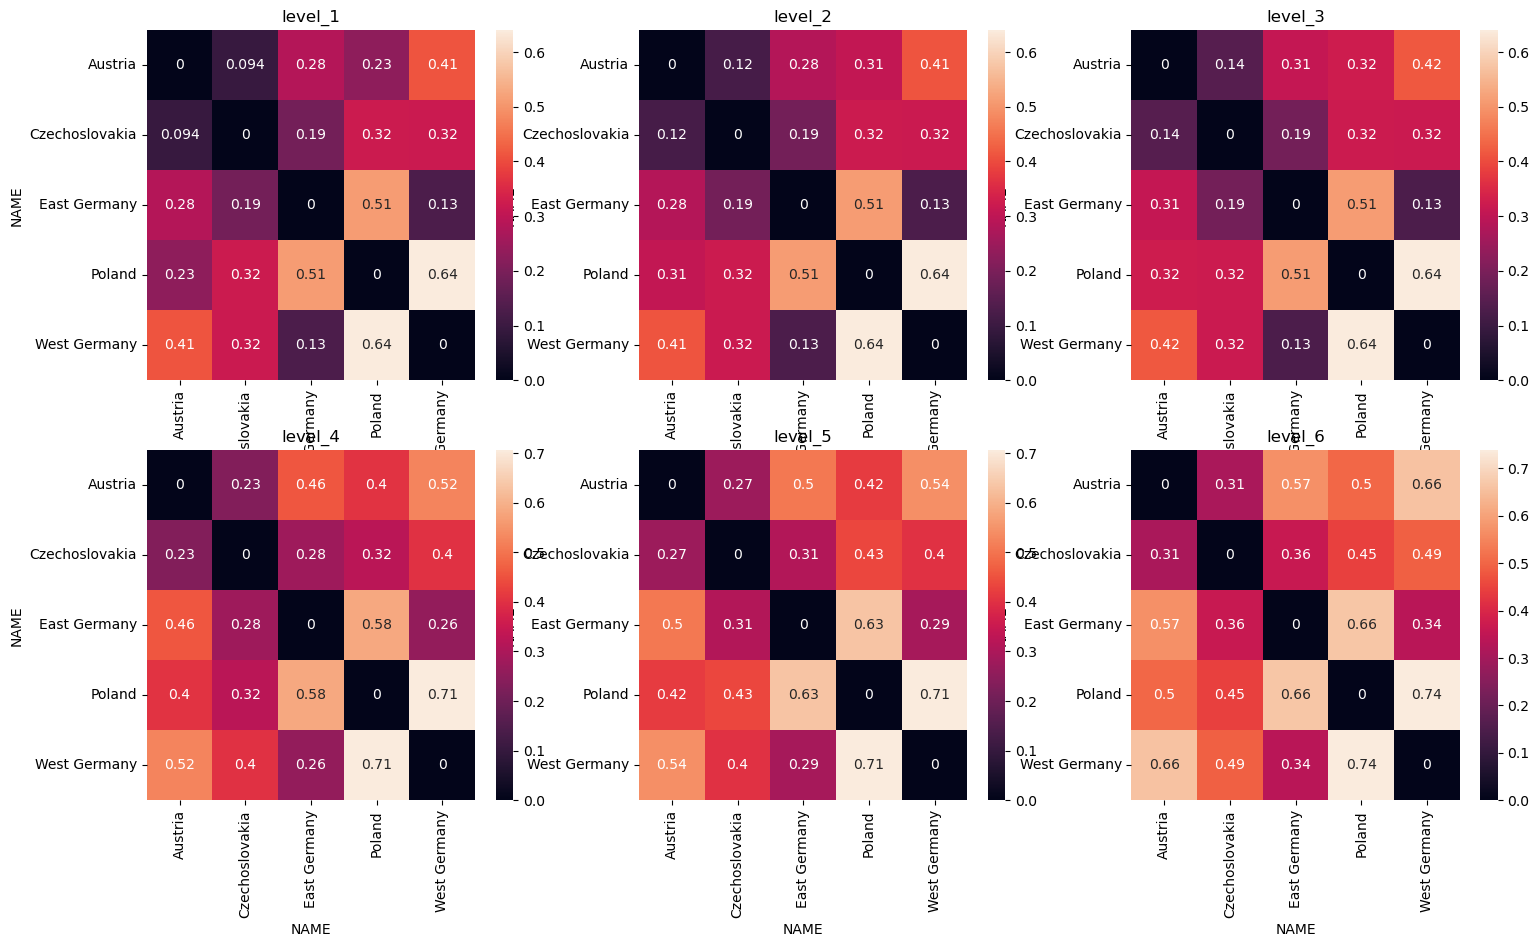

In [43]:
generate_bc_heatmaps_for_boundary(level_columns)

In [63]:
grouped = joined.groupby("NAME")["level_4"].value_counts()

In [64]:
cnt_table = pd.DataFrame(grouped.unstack().fillna(0).T)
cnt_table = cnt_table.drop([3,4,10])
cnt_table

NAME,Austria,Czechoslovakia,East Germany,Poland,West Germany
level_4,,,,,
1,295882.0,863579.0,1492206.0,600894.0,8177983.0
2,97407.0,71026.0,323224.0,41404.0,699554.0
5,526396.0,855001.0,1497608.0,1457583.0,1553502.0
6,58910.0,316490.0,1020521.0,117546.0,9646126.0
7,519449.0,853600.0,1487431.0,421834.0,5377804.0
8,409896.0,1052377.0,2312078.0,553595.0,8397958.0
9,176053.0,178496.0,16735.0,2822365.0,90285.0
11,363.0,55729.0,15482.0,742410.0,34532.0
12,9744.0,268776.0,262756.0,1801896.0,168859.0


In [65]:
region_building_sums = cnt_table.sum(axis=0)
cnt_table_norm = cnt_table.div(region_building_sums, axis=1)
cnt_table_norm.sum()

NAME
Austria           1.0
Czechoslovakia    1.0
East Germany      1.0
Poland            1.0
West Germany      1.0
dtype: float64

## Bray-Curtis

In [66]:
cnt_table_norm.iloc[:,0]

level_4
1     0.067609
2     0.022257
5     0.120281
6     0.013461
7     0.118694
8     0.093661
9     0.040228
11    0.000083
12    0.002227
13    0.443387
14    0.057529
15    0.014902
16    0.005681
Name: Austria, dtype: float64

In [67]:
def compute_bc_matrix(count_table):
    num_regions = len(count_table.columns)
    bray_curtis_matrix = np.zeros((num_regions, num_regions))

    for i in range(num_regions):
        for j in range(num_regions):
            if i != j:
                reg_i = count_table.iloc[:,i]
                reg_j = count_table.iloc[:,j]
                bray_curtis_matrix[i,j] = distance.braycurtis(reg_i, reg_j)

    bray_curtis_matrix = pd.DataFrame(bray_curtis_matrix, index=count_table.columns, columns=count_table.columns)
    return bray_curtis_matrix

In [29]:
num_regions = len(cnt_table_norm.columns)

In [19]:
bray_curtis_matrix = np.zeros((num_regions, num_regions))

In [20]:
for i in range(num_regions):
    for j in range(num_regions):
        if i != j:
            reg_i = cnt_table_norm.iloc[:,i]
            reg_j = cnt_table_norm.iloc[:,j]
            bray_curtis_matrix[i,j] = distance.braycurtis(reg_i, reg_j)

In [68]:
bray_curtis_matrix =compute_bc_matrix(cnt_table_norm)

In [69]:
bray_curtis_matrix


NAME,Austria,Czechoslovakia,East Germany,Poland,West Germany
NAME,,,,,
Austria,0.000000,0.231696,0.456362,0.403617,0.523646
Czechoslovakia,0.231696,0.000000,0.277442,0.323145,0.400435
East Germany,0.456362,0.277442,0.000000,0.583337,0.259323
Poland,0.403617,0.323145,0.583337,0.000000,0.705573
West Germany,0.523646,0.400435,0.259323,0.705573,0.000000


<Axes: xlabel='NAME', ylabel='NAME'>

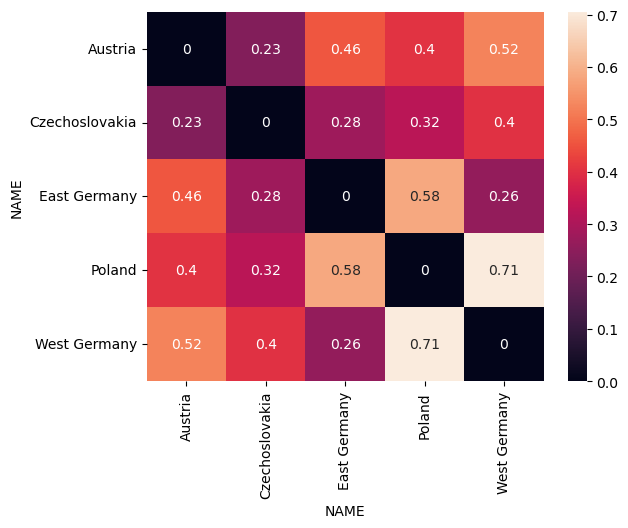

In [70]:
sns.heatmap(bray_curtis_matrix, annot=True)

## Draw borders

<Axes: >

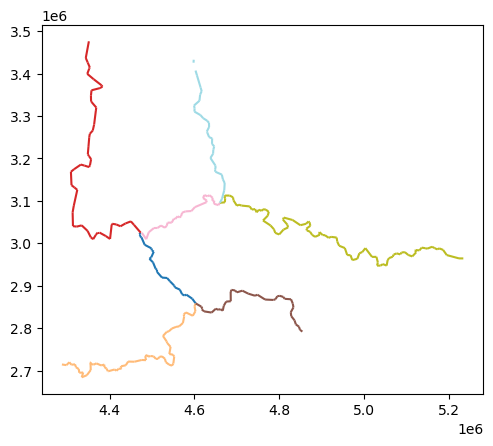

In [78]:
indices = boundaries.sindex.query(boundaries.geometry, predicate="intersects")
left, right = np.unique(np.sort(indices, axis=0), axis=1)

mask = left == right
left = left[~mask]
right = right[~mask]
geoms = boundaries.iloc[left].intersection(boundaries.iloc[right], align=False)
left = boundaries.NAME.iloc[left]
right = boundaries.NAME.iloc[right]

geoms.plot(cmap='tab20')

In [96]:
geoms

0    MULTILINESTRING ((4470617.452 3025026.023, 447...
0    MULTILINESTRING ((4603174.085 2858273.123, 460...
0    MULTILINESTRING ((4351305.316 3476171.174, 434...
1    MULTILINESTRING ((4854633.284 2791782.465, 484...
1    MULTILINESTRING ((4630531.409 3110893.427, 463...
1    MULTILINESTRING ((4660255.78 3095529.129, 4671...
3    MULTILINESTRING ((4598483.274 3432717.975, 459...
dtype: geometry

In [86]:
bray_curtis_matrix.loc[left.iloc[0],right.iloc[0]]

np.float64(0.4004353322329587)

In [99]:
geoms = gpd.GeoDataFrame(geometry=geoms)

In [100]:
border_widths = []

for l, r in zip(left, right):
    border_widths.append(bray_curtis_matrix.loc[l, r])


In [102]:
geoms["width"] = [np.sqrt(w) for w in border_widths]
geoms

,geometry,width
0,"MULTILINESTRING ((4470617.452 3025026.023, 447...",0.632800
0,"MULTILINESTRING ((4603174.085 2858273.123, 460...",0.723634
0,"MULTILINESTRING ((4351305.316 3476171.174, 434...",0.509238
1,"MULTILINESTRING ((4854633.284 2791782.465, 484...",0.481348
1,"MULTILINESTRING ((4630531.409 3110893.427, 463...",0.526727
1,"MULTILINESTRING ((4660255.78 3095529.129, 4671...",0.568459
3,"MULTILINESTRING ((4598483.274 3432717.975, 459...",0.763765


In [109]:
widths = (geoms.width - geoms.width.min()) / (geoms.width.max() - geoms.width.min())

geoms["map_width"] = widths
geoms

,geometry,width,map_width
0,"MULTILINESTRING ((4470617.452 3025026.023, 447...",0.632800,0.536269
0,"MULTILINESTRING ((4603174.085 2858273.123, 460...",0.723634,0.857901
0,"MULTILINESTRING ((4351305.316 3476171.174, 434...",0.509238,0.098755
1,"MULTILINESTRING ((4854633.284 2791782.465, 484...",0.481348,0.000000
1,"MULTILINESTRING ((4630531.409 3110893.427, 463...",0.526727,0.160682
1,"MULTILINESTRING ((4660255.78 3095529.129, 4671...",0.568459,0.308447
3,"MULTILINESTRING ((4598483.274 3432717.975, 459...",0.763765,1.000000


<Axes: >

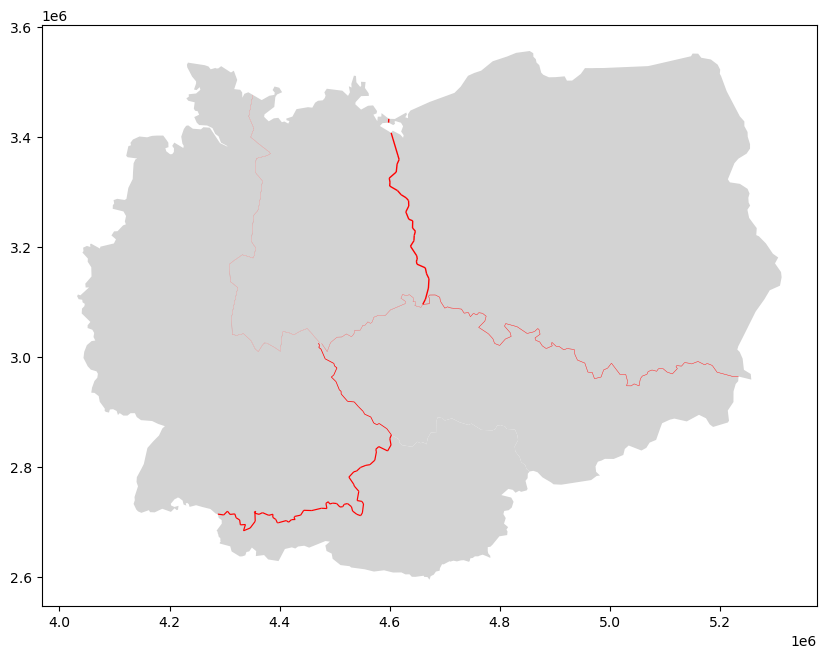

In [110]:
fig, ax = plt.subplots(figsize=(10,10))
boundaries.plot(ax=ax, color='lightgray')

geoms.plot(ax=ax, linewidth=geoms["map_width"], color='red')

## Principal Coordinates visualization

In [24]:
from skbio.stats.ordination import pcoa
from skbio.stats.distance import DistanceMatrix

In [25]:
pcoa_res = pcoa(DistanceMatrix(bray_curtis_matrix, ids=cnt_table_norm.columns))

In [26]:
pcoa_res_df = pd.DataFrame(pcoa_res.samples.iloc[:, :2], index=cnt_table_norm.columns)

In [27]:
pcoa_res_df

,PC1,PC2
NAME,,
Austria,-0.131978,0.210060
Czechoslovakia,-0.051598,-0.013323
East Germany,0.205911,-0.085319
Poland,-0.357217,-0.118359
West Germany,0.334882,0.006941


<Axes: xlabel='PC1', ylabel='PC2'>

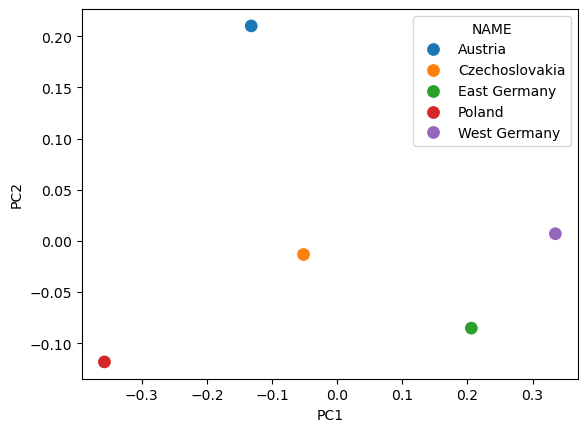

In [28]:
sns.scatterplot(x="PC1", y="PC2", hue=pcoa_res_df.index, data=pcoa_res_df, s=100)